<a href="https://colab.research.google.com/github/anadiedrichs/curso_deep_learning/blob/main/6_Introducci%C3%B3n_a_redes_KAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kolmogorov - Arnold Networks (KAN)

## 💡 Motivación

Ya conocen bien el mundo del *machine learning* y cómo las Redes Neuronales Multicapa (MLP) han sido las estrellas del espectáculo. Pero, ¿qué tal si les digo que hay un nuevo contendiente en el ring que podría cambiar las reglas del juego? Les presento a las **Redes KAN (Kolmogorov-Arnold Networks)**.

Imaginen esto: el famoso **Teorema de Kolmogorov-Arnold** nos dice algo alucinante: cualquier función compleja que dependa de muchas variables (¡como las que enfrentamos en nuestros modelos!) puede, en teoría, descomponerse en sumas y composiciones de funciones más simples, ¡funciones de una sola variable! Las KAN toman esta idea matemática poderosa y la convierten en una arquitectura de red. En lugar de las tradicionales neuronas con una simple activación lineal y luego una no linealidad fija, las KAN utilizan funciones de activación *aprendibles* en cada conexión. ¡Es como si cada cable de la red tuviera su propia mini-calculadora inteligente!

¿Y cuál es el resultado? Para ciertas tareas, las KAN están demostrando ser no solo más eficientes, sino también más precisas que nuestras queridas MLP. Piénsenlo: podrían obtener mejores resultados con modelos potencialmente más pequeños y fáciles de interpretar.

Sumergirse en las KAN no es solo añadir otra herramienta a su arsenal. Es profundizar en los cimientos matemáticos del *deep learning* y, lo más emocionante, es abrir la puerta a soluciones innovadoras para modelar datos complejos, optimizar procesos como nunca antes y resolver esos problemas que nos quitan el sueño.

Entender y dominar cómo funcionan las KAN es su pase para estar en la cresta de la ola, desarrollando sistemas de inteligencia artificial que no solo sean potentes, sino también más transparentes y eficaces. ¡Prepárense para explorar una nueva frontera en la IA!

## 🧠 Repaso de redes neuronales ( MLP )


Siendo $f$ alguna función de activación (Sigmoide, ReLU, tanh, etc), $x$ las features de entrada, $w$ los pesos o coeficientes de la red neuronal, $b$ el coeficiente bias, podemos definir una red neuronal de una sola capa como se indica en la siguiente fórmula.

$$
  z = f \left( \sum_{i=1}^{n} w_i x_i + b \right) $$

 O en notación matricial / vectorial:

 $$ z = f(Wx + b )$$

Antes de entrenar una MLP definimos hiperparámetros como en número de capas, la cantidad de unidades ocultas por capa, funciones de activación a aplicar en cada capa.

En el siguiente gráfico observamos una representación de MLP donde:

* los círculos verdes son las variables (features) de entrada (representadas por el vector $x$ o individualmente como $x_1$ y $x_2$)
* los círculos naranjas son las capas ocultas. Observamos dos capas ocultas.
* la primer capa oculta con 4 unidades ($w_1$) y la segunda capa oculta con dos unidades ($w_2$).
* en celeste se representa la capa de salida de la red.
* cada línea representa una interacción entre el valor del nodo y un peso de la red



![](https://www.dailydoseofds.com/content/images/size/w1000/2024/05/image-58.png)


## Simulación en playground

https://playground.tensorflow.org/

## Funciones lineales vs no lineal

En el contexto de **matemática** y **machine learning**, las funciones **lineales** y **no lineales** se diferencian por cómo relacionan sus variables de entrada con la salida.



### Función **lineal**:
Una función es **lineal** si puede escribirse como una combinación lineal de sus variables, es decir:

$$ f(x) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b $$

Donde:
- $ x_i $ son las variables de entrada.
- $ w_i $ son los coeficientes o pesos.
- $ b $ es una constante (término independiente).
- La gráfica de una función lineal en 2D es una **línea recta** y en n dimensiones es un **hiperplano**.

💡 En **machine learning**, un modelo lineal (como la **regresión lineal**) asume que la salida es una función lineal de las entradas.





###  Función **no lineal**:
Una función es **no lineal** si **no puede** representarse como una suma ponderada simple de las variables. Incluye términos como:

- Polinomios de grado mayor a 1: $ x^2, x^3, \dots $
- Funciones trigonométricas: $ \sin(x), \cos(x) $
- Funciones exponenciales o logarítmicas: $ e^x, \log(x) $
- Funciones compuestas: $ \text{ReLU}(w^T x + b), \tanh(x), \sigma(x) $

💡 En **machine learning**, modelos como las **redes neuronales**, **árboles de decisión**, o **SVM con kernel** pueden aprender relaciones no lineales, lo que los hace más flexibles para representar patrones complejos.

### Ejemplo simple:
- Lineal: $ f(x) = 3x + 2 $
- No lineal: $ f(x) = x^2 + 2 $


# 🤯 Redes KAN

## Introducción

Así es como observamos una red neuronal.

![](https://www.dailydoseofds.com/content/images/2024/05/Screenshot-2024-05-18-at-3.15.37-PM.png)

Hemos trabajado construido antes MLP con matrices de pesos convencionales.

Sin embargo, las KANs se basan en una idea diferente. Las matrices que poseen en una capa no contienen pesos, sino funciones, las cuales se aplican a la entrada de dicha capa.

![](https://www.dailydoseofds.com/content/images/size/w1000/2024/05/image-90.png)

Comencemos!


Las KANs desafían el diseño tradicional de las redes neuronales y ofrecen un nuevo paradigma para diseñarlas y entrenarlas.

En resumen, la idea es que, en lugar de simplemente apilar muchas capas una sobre otra (las cuales son siempre transformaciones lineales, y donde introducimos la no linealidad de forma deliberada mediante funciones de activación), las KANs proponen un enfoque alternativo.

Los autores utilizaron funciones complejas aprendibles (llamadas B-Splines) que permiten representar directamente transformaciones no lineales de la entrada, utilizando relativamente menos parámetros que una red neuronal tradicional.

![](https://www.dailydoseofds.com/content/images/size/w1000/2024/05/image-60.png)

En la imagen anterior, si prestás atención:

* En una red neuronal, las funciones de activación son fijas en toda la red y están ubicadas en cada nodo (como se muestra a continuación).

* En cambio, en una KAN, las funciones de activación se encuentran en las aristas (que corresponden a los pesos en una red neuronal tradicional), y cada arista tiene una función de activación diferente.

Por lo tanto, es evidente esperar que las KANs sean mucho más precisas e interpretables con menos parámetros.

Están basadas en el **Teorema de Representación de Kolmogorov-Arnold**, el cual afirma que cualquier función continua multivariable puede representarse como la composición de un número finito de funciones continuas de una sola variable.

![](https://www.dailydoseofds.com/content/images/size/w1000/2024/05/image-70.png)

Si desarrollamos los términos de la suma, obtenemos lo siguiente:

![](https://www.dailydoseofds.com/content/images/size/w1000/2024/05/image-77.png)

Para resumir todo, lo que hacemos en una sola capa de una KAN es tomar la entrada $(x_1, x_2, \dots, x_n)$ y aplicarle una transformación $\phi$.

![](https://www.dailydoseofds.com/content/images/2024/05/image-83.png)

Por lo tanto, la matriz de transformación $\Phi_1$ (correspondiente a la primera capa) puede representarse de la siguiente manera:

![](https://www.dailydoseofds.com/content/images/2024/05/image-84.png)

En la matriz anterior:

- $n$ representa la cantidad de entradas.  
- $m$ representa la cantidad de nodos de salida en esa capa.  
- $\phi_{mn}$**[IMPORTANTE] Cada elemento de la matriz no son números, sino funciones univariadas.** Por ejemplo:
  - $\phi_{11}$ podría ser $7x^2 - 3x + 1$.  
  - $\phi_{12}$ podría ser $3x^3 + 5x^2 + x - 7$.  
  - y así sucesivamente...

Entonces, para generar una transformación, todo lo que tenemos que hacer es tomar el vector de entrada y pasarlo por las funciones correspondientes en la matriz de transformación anterior:

![](https://www.dailydoseofds.com/content/images/2024/05/image-85.png)

Esto brinda como resultado el siguiente vector:

![](https://www.dailydoseofds.com/content/images/2024/05/image-86.png)

Lo anterior es la salida de la primera capa, la cual luego se pasa a la siguiente capa para otra transformación mediante funciones.

Por lo tanto, toda la red KAN puede condensarse en una sola fórmula de la siguiente manera:

![](https://www.dailydoseofds.com/content/images/size/w1000/2024/05/image-87.png)

Donde:

- $x$ representa el vector de entrada.  
- $\phi^k$ representa la matriz de transformación funcional de la capa $k$.  
- $KAN(x)$ es la salida de la red KAN.

En el caso de las KANs, las matrices $\phi^k$ son matrices de transformación no lineales, y cada función univariada puede ser bastante diferente.

Pero, ¿cómo estimamos las funciones univariadas en cada una de las matrices de transformación? Para esto se utilizan B-splines.

Recordá que, al crear B-splines, ya contamos con nuestros puntos de control ($P_1, P_2, \dots, P_n$) y con las funciones base subyacentes, determinadas por el grado $k$.

Al variar la posición de los puntos de control, obtenemos distintas curvas, como se muestra en el video a continuación:

![](https://i.postimg.cc/HkYP78hG/Recording-2025-04-11-at-11-53-20.gif)



**Entonces, acá está la idea central de las KANs:**

`*Hagamos que las posiciones de los puntos de control sean aprendibles dentro de la función de activación, de modo que el modelo sea libre de aprender cualquier forma arbitraria de función de activación que se ajuste mejor a los datos.*`


Eso es todo.

Al ajustar las posiciones de los puntos de control durante el entrenamiento, el modelo KAN puede moldear dinámicamente las funciones de activación que mejor se adapten a los datos.

- Se comienza con posiciones iniciales para los puntos de control, igual que hacemos con los pesos.  
- Durante el proceso de entrenamiento, se actualizan las posiciones de estos puntos de control mediante backpropagation, de forma similar a como se actualizan los pesos en una red neuronal.  
- Se utiliza un algoritmo de optimización (por ejemplo, descenso por gradiente) para ajustar los puntos de control y así minimizar la función de pérdida del modelo.

Desde un punto de vista matemático, en las KANs, cada función de activación $\phi(x)$ se define de la siguiente manera:

![](https://www.dailydoseofds.com/content/images/2024/05/image-133.png)

Dentro de esto:

![](https://www.dailydoseofds.com/content/images/size/w1000/2024/05/image-135.png)


- El cálculo involucra una función base $b(x)$ (similar a las conexiones residuales).  
- $spline(x)$ es aprendible, específicamente los parámetros $c_i$, que indican la posición de los puntos de control.  
- Hay otro parámetro $w$. Los autores dicen que, en principio, $w$ es redundante, ya que puede ser absorbido en $b(x)$ y $spline(x)$. Sin embargo, igual incluyeron este factor $w$ para controlar mejor la magnitud general de la función de activación.

Una vez definido todo esto, la red puede entrenarse como cualquier otra red neuronal.

Más específicamente:

- Inicializamos cada una de las matrices $\phi$ de la siguiente manera:

![](https://www.dailydoseofds.com/content/images/2024/05/image-140.png)

- Ejecutar el paso hacia adelante (forward pass):

![](https://www.dailydoseofds.com/content/images/size/w1000/2024/05/image-141.png)


- Calcular la función de pérdida y ejecutar backpropagación.

¡Listo!


# 💻**Implementación en PyTorch**

Primero, importamos las librerías necesarias:

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.nn.parameter import Parameter
from scipy.interpolate import BSpline

Bien, equipo, ¡vamos a sumergirnos en el código! Verán que la mayoría de las líneas de `import` al principio son como las herramientas que ya conocen y aman de su caja de herramientas de Python. Pero hay una que quizás llame su atención: la que traemos desde `scipy`. Esta nos va a ayudar con algo súper interesante llamado **B-splines**.

¿Qué son los B-splines? Imaginen que quieren dibujar una curva suave y flexible que pase por ciertos puntos o se aproxime a una forma específica. Los B-splines son como piezas de Lego matemáticas (polinomios por tramos, para ser más técnicos) que nos permiten construir esas curvas de manera muy precisa. Son geniales para cosas como el diseño gráfico, pero aquí les daremos un uso aún más *cool*.

Dentro de `scipy`, usaremos la clase `BSpline`. Piensen en ella como nuestro "constructor de curvas B-spline". Le diremos qué tan "ondulada" queremos la curva (su grado), por dónde más o menos tiene que pasar (puntos de control) y cómo se unen esos tramos (el vector de nudos).

Ahora, aquí viene la magia para nuestra red neuronal: en lugar de que las conexiones entre neuronas (los pesos) sean simples números que multiplican las entradas, ¡vamos a usar estos B-splines para crear **funciones de activación personalizadas y flexibles**! Esto significa que cada "cable" en nuestra red no solo ajustará la fuerza de la señal, sino que aprenderá una *función completa* (una curva B-spline) para transformar la entrada de una manera mucho más sofisticada.

Así que, el siguiente paso es construir el corazón de esta idea. Definiremos algo que llamaremos una entidad **"edge"** (o "borde" / "conexión"). Esta será una clase especial de PyTorch que encapsulará nuestra nueva y flamante función de activación basada en B-splines. ¡Prepárense para ver cómo las conexiones de nuestra red cobran vida propia!

In [ ]:
class UnivariateActivationFunction(nn.Module):
    def __init__(self, degree=3, control_pts=10):
        super(UnivariateActivationFunction, self).__init__()

        self.degree = degree
        self.control_pts = control_pts

        # Initialize control points for B-spline with small random values
        self.control_points = Parameter(torch.randn(control_pts) * 0.01)
        self.knots = torch.linspace(0, 1, control_pts + degree + 1).tolist()

        # Initialize a single weight parameter with a small random value
        self.w = Parameter(torch.randn(1) * 0.01)

Desglose del código anterior:

- **Líneas 5 a 6**: Almacenamos el grado del B-spline y el número de puntos de control como variables de instancia.  
- **Línea 9**: Inicializamos los puntos de control del B-spline con pequeños valores aleatorios. Estos puntos de control son parámetros aprendibles, por eso usamos la clase `Parameter` de PyTorch.  
- **Línea 10**: El vector de nudos del B-spline se crea usando `torch.linspace`. El vector de nudos es una secuencia de valores de parámetro que determinan dónde y cómo los puntos de control afectan la curva del B-spline.  
- **Línea 13**: Inicializamos un parámetro de peso $w$ con un pequeño valor aleatorio. Este parámetro escalará la contribución del B-spline y de la activación SiLU en la salida final.

Dado que las funciones de activación son univariadas, escribiremos nuestra implementación de manera tal que estas se invoquen característica por característica (feature-by-feature).

![](https://www.dailydoseofds.com/content/images/2024/06/image-8.png)

- La primera característica ($x_0$) se pasará a través de las funciones en la primera columna de la matriz de activación.  
- Luego, la segunda característica ($x_1$) se pasará a través de las funciones en la segunda columna de la matriz de activación.  
- Y así sucesivamente...

Por lo tanto, definimos el método `forward`, que calcula la salida de la función de activación sobre una característica:

In [ ]:
class UnivariateActivationFunction(nn.Module):
    def __init__(self, degree=3, control_pts=10):
        super(UnivariateActivationFunction, self).__init__()

        self.degree = degree
        self.control_pts = control_pts

        # Initialize control points for B-spline with small random values
        self.control_points = Parameter(torch.randn(control_pts) * 0.01)
        self.knots = torch.linspace(0, 1, control_pts + degree + 1).tolist()

        # Initialize a single weight parameter with a small random value
        self.w = Parameter(torch.randn(1) * 0.01)

    def forward(self, x):
        # Compute SiLU (Sigmoid Linear Unit) activation
        silu_x = F.silu(x)

        # Compute B-spline basis functions
        spline_x = self.compute_bspline(x)

        # Combine SiLU and B-spline
        phi_x = self.w * (silu_x + spline_x)

        return phi_x

    def compute_bspline(self, x):

        bspline_values = []
        for i in range(len(x)):
            bspline_value = BSpline(self.knots,
                                    self.control_points.detach().numpy(),
                                    self.degree)(x[i].item())
            bspline_values.append(bspline_value)

        bspline_values = np.array(bspline_values)
        return torch.tensor(bspline_values, dtype=torch.float32)

Con eso, ya hemos implementado la función de activación univariada.

A continuación, pasemos a la capa personalizada, la cual estará compuesta por una estructura similar a una matriz de las funciones univariadas mencionadas anteriormente, como se muestra a continuación:

![](https://www.dailydoseofds.com/content/images/2024/05/image-85.png)

In [ ]:
class KANLayer(nn.Module):
    def __init__(self, in_features, out_features, degree=3, control_pts =10):
        super(KANLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.degree = degree
        self.control_pts = control_pts

        # Initialize the matrix of univariate functions
        self.phi_matrix = nn.ModuleList()

        for i in range(in_features):
            row = nn.ModuleList()

            for j in range(out_features):
                row.append(UnivariateActivationFunction(degree, control_pts))

            self.phi_matrix.append(row)

    def forward(self, x):
        # Compute the output using the univariate functions
        out = torch.zeros(x.size(0), self.out_features)
        for i in range(self.in_features):
            for j in range(self.out_features):
                out[:, j] += self.phi_matrix[i][j](x[:, i])
        return out

Supongamos que tenemos un batch size de 3, una entrada de 2 dimensiones y queremos proyectarla a 4 dimensiones. Entonces, en esta capa KAN tendremos las siguientes matrices:

![](https://www.dailydoseofds.com/content/images/2024/05/image-163.png)

Esta capa se verá algo así:

![](https://www.dailydoseofds.com/content/images/2024/05/image-159.png)

Ahora que entendimos el funcionamiento interno de nuestra capa, vamos a definir nuestra clase de red, que será una composición de capas personalizadas conectadas entre sí.

Esto se implementa a continuación, y es bastante similar a lo que hacemos en una red MLP tradicional:

In [ ]:
class KANModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(KANModel, self).__init__()
        self.hidden = KANLayer(input_size, hidden_size)
        self.output = KANLayer(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        return x

¡Listo!

Ahora, continuemos creando un dataset ficticio para regresión:

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=2, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

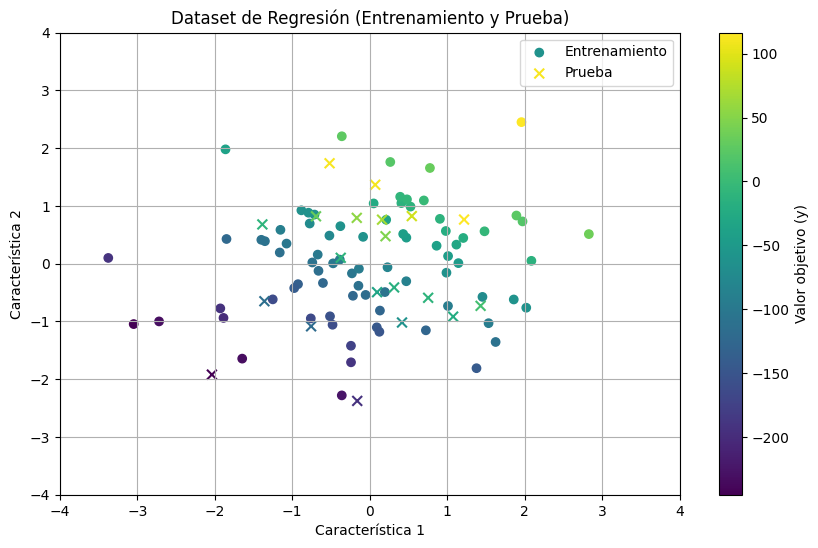

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', s=50, label='Prueba')
plt.colorbar(label='Valor objetivo (y)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title('Dataset de Regresión (Entrenamiento y Prueba)')
plt.legend()
plt.grid(True)
plt.show()

A continuación, vamos a preprocesarlo usando un *min-max scaler* y luego lo convertimos a tensores de PyTorch:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# define scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Transform data
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

Ahora estamos listos para entrenar esta red.

Primero, definimos el modelo, la función de pérdida y el optimizador:

In [ ]:
# Define the model, loss function, and optimizer
model = KANModel(input_size=2, hidden_size=5, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

A continuación, definimos el bucle de entrenamiento y entrenamos la red:


In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0140
Epoch [20/100], Loss: 0.0180
Epoch [30/100], Loss: 0.0059
Epoch [40/100], Loss: 0.0035
Epoch [50/100], Loss: 0.0038
Epoch [60/100], Loss: 0.0033
Epoch [70/100], Loss: 0.0038
Epoch [80/100], Loss: 0.0043
Epoch [90/100], Loss: 0.0153
Epoch [100/100], Loss: 0.0030


A partir del valor de la pérdida por época, queda claro que el modelo converge de forma bastante fluida.

También podemos evaluarlo sobre el conjunto de prueba y calcular la pérdida en test de la siguiente manera:

In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze()
    test_loss = criterion(predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 0.0061


## **Paquete oficial de KAN**

Como mencionamos anteriormente en el artículo, nuestra intención fue implementar una versión simplificada de las KAN que no coincide por completo con la implementación original.

El objetivo era darte una idea general de cómo puede entrenarse una red que no contiene matrices de pesos tradicionales, sino funciones univariadas.

La implementación original incluye funcionalidades más sofisticadas, como **extensión de grilla**, **esparsificación**, entre otras, que hacen que la red sea más robusta, pero que no consideramos aquí por una cuestión de simplicidad.

Para tus proyectos, se recomienda utilizar la implementación oficial. En esta sección, vamos a ver cómo usarla.

El paquete de KAN (`pykan`) puede instalarse de la siguiente manera:

In [ ]:
!pip install pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 5.1 MB/s eta 0:00:00


Ahora estamos listos para utilizar la implementación oficial de KAN.

Iniciá una sesión de Jupyter Notebook en la carpeta kan_demo y creá un nuevo notebook. Llamémoslo KAN_demo.ipynb.

Primero, creamos un dataset ficticio usando el método create_dataset de KAN de la siguiente manera:

In [ ]:
from kan import *

f = lambda x: torch.sin(x[:,[0]]**2 + x[:,[1]]**2)

data = create_dataset(f, n_var=2)

data['train_input'].shape, data['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

A continuación, definimos nuestra red KAN simple de la siguiente manera:

In [ ]:
from kan import *

model = KAN(width=[2,1,1], grid=10, k=3, seed=0)

checkpoint directory created: ./model
saving model version 0.0


Esta red tiene:

- Entradas de 2 dimensiones.  
- Una salida de 1 dimensión.  
- Spline cúbico ($k=3$).  
- Cinco intervalos de grilla (`grid=5`).

Podemos graficar el modelo KAN en su estado inicial usando el método `model.plot()` de la siguiente manera:

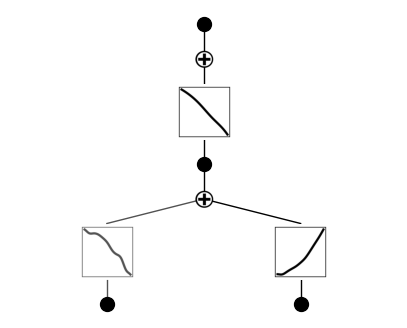

In [ ]:
model(data["train_input"])
model.plot()

A continuación, entrenamos el modelo usando el método `model.train()` de la siguiente manera:

In [ ]:
model.fit(data, steps=20)

| train_loss: 3.16e-04 | test_loss: 3.33e-04 | reg: 4.79e+00 | : 100%|█| 20/20 [00:11<00:00,  1.80it

saving model version 0.1


{'train_loss': [array(0.03182479, dtype=float32),
  array(0.02083735, dtype=float32),
  array(0.00884441, dtype=float32),
  array(0.00526045, dtype=float32),
  array(0.004704, dtype=float32),
  array(0.00305537, dtype=float32),
  array(0.0023022, dtype=float32),
  array(0.00165552, dtype=float32),
  array(0.00109674, dtype=float32),
  array(0.00096829, dtype=float32),
  array(0.00078931, dtype=float32),
  array(0.00055394, dtype=float32),
  array(0.00043914, dtype=float32),
  array(0.00041276, dtype=float32),
  array(0.00037685, dtype=float32),
  array(0.0003576, dtype=float32),
  array(0.00035112, dtype=float32),
  array(0.00034194, dtype=float32),
  array(0.00032234, dtype=float32),
  array(0.00031624, dtype=float32)],
 'test_loss': [array(0.03213876, dtype=float32),
  array(0.02032783, dtype=float32),
  array(0.00863614, dtype=float32),
  array(0.00529203, dtype=float32),
  array(0.00464948, dtype=float32),
  array(0.00303307, dtype=float32),
  array(0.0023136, dtype=float32),
  arr

Al graficar nuevamente el modelo usando el método `model.plot()`, obtenemos esta vez el siguiente gráfico:

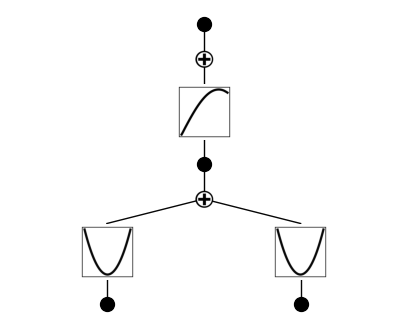

In [ ]:
model.plot()

Aquí, recordá que el dataset que creamos anteriormente era la suma de los cuadrados de $x_1$ y $x_2$:

In [ ]:
f = lambda x: x[:,[0]]**2 + x[:,[1]]**2

Las activaciones aprendidas por el modelo parecen estar totalmente alineadas con elevar al cuadrado los términos individuales de cada característica, ¿no te parece?

![](https://www.dailydoseofds.com/content/images/2024/06/image-6.png)



# Cierre

Imagina que te mostramos cómo funcionan las Redes de Kolmogorov-Arnold (KAN) usando el programa original que crearon sus inventores. ¡Es como ver al chef preparar su receta!

Ahora, los creadores de KAN han sido muy honestos sobre uno de sus principales desafíos: entrenarlas lleva su tiempo. Piénsalo así: si una Red Neuronal Multicapa (MLP) tradicional es como una bicicleta rápida, una KAN, con la misma cantidad de "piezas" (parámetros), sería como una bicicleta unas 10 veces más lenta.

Pero, ¡ojo! No todo es velocidad. Aunque parezca una gran diferencia, el rendimiento general podría no ser tan distinto. ¿Por qué? Porque, como dijimos antes, las KAN suelen necesitar muchas menos "piezas" que las MLP para hacer el mismo trabajo. Es como si esa bicicleta más lenta pudiera tomar atajos geniales.

Los creadores también nos cuentan que, por ahora, no se han concentrado al máximo en hacer que las KAN sean súper veloces. Ven estos "atascos" más como un desafío de ingeniería, algo que se puede solucionar con más ingenio en el futuro, ya sea por ellos mismos o por la comunidad de desarrolladores.

Y hablando de la comunidad, ¡pasó algo increíble! En tan solo una semana después de que se conocieran las KAN, alguien ya había creado una versión más rápida llamada **efficient-KAN**. Puedes encontrarla y explorarla en este [repositorio de GitHub](https://github.com/Blealtan/efficient-kan?ref=dailydoseofds.com). ¡Así de rápido se mueve el mundo de la tecnología!


# Referencias

[1] Imágenes y paso a paso tomado del blog https://www.dailydoseofds.com/implementing-kans-from-scratch-using-pytorch/

[2] Video Kolmogorov-Arnold Networks (KANs) - What are they and how do they work? https://www.youtube.com/watch?v=myFtp5zMv8U

[3] Paper original de redes KAN
https://arxiv.org/abs/2404.19756

[4] Recursos varios sobre redes KAN
https://github.com/mintisan/awesome-kan